### Imports

Required packages including those needed for `image_arrays.py` and `hdf_utils.py`.
- h5py
- numpy
- scipy
- matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.patches import Rectangle

# local imports
from image_arrays import *
from hdf_utils import unpack_hdf
from plot_utils import clean_axes, simple_beeswarm

### Activate interactive plotting
By default, inline plots are static. Here we specify one of two options (comment out the undesired command) that will open plots with GUI controls for us.
- **qt ->** figures opened in windows outside the notebook
- **notebook ->** figures within notebook underneath generating cell.

In [2]:
# %matplotlib qt 
%matplotlib notebook

### Load data

In [3]:
d = {}
d_rois = {}
for depth in ["DD", "PD"]:
    with h5.File("triggered_20hz_spot/triggered_waves_full_scan1_%s.h5" % depth) as f:
        d[depth] = unpack_hdf(f)
    with h5.File("triggered_20hz_spot/triggered_waves_10um_scan1_%s.h5" % depth) as f:
        d_rois[depth] = unpack_hdf(f)

dd = d["DD"]
pd = d["PD"]
dd_rois = d_rois["DD"]
pd_rois = d_rois["PD"]
rec_dt = pd["rec_xaxis"][1] - pd["rec_xaxis"][0]
noise_dt = pd["noise_xaxis"][1] - pd["noise_xaxis"][0]
dd_df = (dd["rec"] - np.mean(dd["rec"][-200:])) / np.mean(dd["rec"][-200:])
pd_df = (pd["rec"] - np.mean(pd["rec"][-200:])) / np.mean(pd["rec"][-200:])
dd_rois_df = (
    (dd_rois["rec"] - np.mean(dd_rois["rec"][:, :, -200:])) 
    / np.mean(dd_rois["rec"][:, :, -200:]))
pd_rois_df = (
    (pd_rois["rec"] - np.mean(pd_rois["rec"][:, :, -200:])) 
    / np.mean(pd_rois["rec"][:, :, -200:]))

print("Data Keys")
print("-------------")
for k in dd.keys():
   print(k) 

Data Keys
-------------
avg_cross_corr
avg_trig_event
avg_trig_lead
cross_xaxis
event_xaxis
glusnfr_template
lead_xaxis
noise_wave
noise_xaxis
offset_cross_xaxis
offset_event_xaxis
offset_lead_xaxis
rec
rec_xaxis
scaled_cross_corr
scaled_trig_event
scaled_trig_lead
trig_events
trig_leads


## Distal

<IPython.core.display.Javascript object>


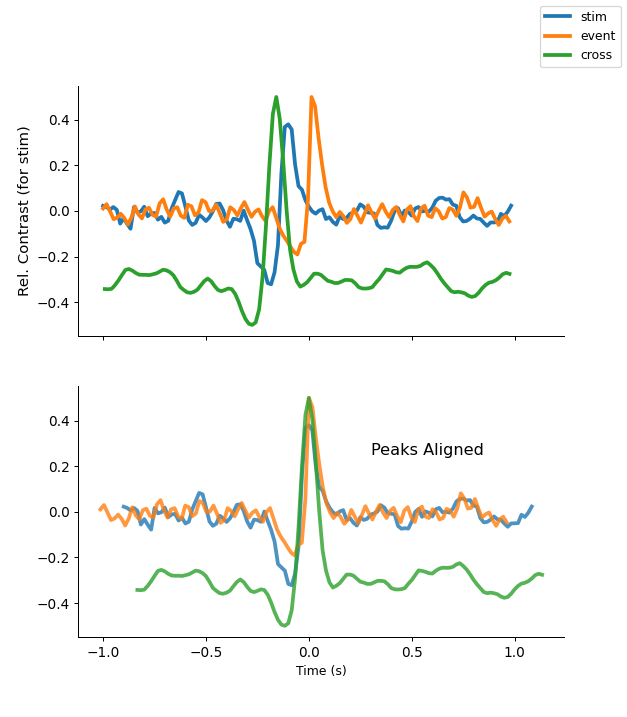

In [4]:
lead_vs_event_dd_fig, lead_vs_event_dd_ax = plt.subplots(
    2, sharex=True, sharey=True, figsize=(7, 8))

lead_vs_event_dd_ax[0].plot(dd["lead_xaxis"], dd["scaled_trig_lead"], linewidth=3, label="stim")
lead_vs_event_dd_ax[1].plot(dd["offset_lead_xaxis"], dd["scaled_trig_lead"], linewidth=3, alpha=0.8)

lead_vs_event_dd_ax[0].plot(dd["event_xaxis"], dd["scaled_trig_event"], linewidth=3, label="event")
lead_vs_event_dd_ax[1].plot(dd["offset_event_xaxis"], dd["scaled_trig_event"], linewidth=3, alpha=0.8)

lead_vs_event_dd_ax[0].plot(dd["cross_xaxis"], dd["scaled_cross_corr"], linewidth=3, label="cross")
lead_vs_event_dd_ax[1].plot(dd["offset_cross_xaxis"], dd["scaled_cross_corr"], linewidth=3, alpha=0.8)

lead_vs_event_dd_ax[1].text(0.3, 0.25, "Peaks Aligned", fontsize=13)
lead_vs_event_dd_ax[0].set_ylabel("Rel. Contrast (for stim)", fontsize=12)
lead_vs_event_dd_ax[-1].set_xlabel("Time (s)")

lead_vs_event_dd_fig.legend()
clean_axes(lead_vs_event_dd_ax)

## Proximal

<IPython.core.display.Javascript object>


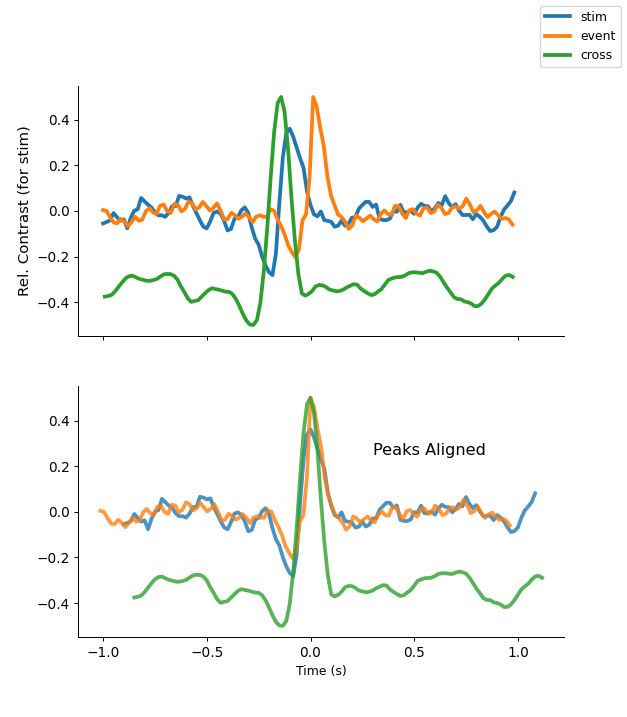

In [5]:
lead_vs_event_pd_fig, lead_vs_event_pd_ax = plt.subplots(
    2, sharex=True, sharey=True, figsize=(7, 8))

lead_vs_event_pd_ax[0].plot(pd["lead_xaxis"], pd["scaled_trig_lead"], linewidth=3, label="stim")
lead_vs_event_pd_ax[1].plot(pd["offset_lead_xaxis"], pd["scaled_trig_lead"], linewidth=3, alpha=0.8)

lead_vs_event_pd_ax[0].plot(pd["event_xaxis"], pd["scaled_trig_event"], linewidth=3, label="event")
lead_vs_event_pd_ax[1].plot(pd["offset_event_xaxis"], pd["scaled_trig_event"], linewidth=3, alpha=0.8)

lead_vs_event_pd_ax[0].plot(pd["cross_xaxis"], pd["scaled_cross_corr"], linewidth=3, label="cross")
lead_vs_event_pd_ax[1].plot(pd["offset_cross_xaxis"], pd["scaled_cross_corr"], linewidth=3, alpha=0.8)

lead_vs_event_pd_ax[1].text(0.3, 0.25, "Peaks Aligned", fontsize=13)
lead_vs_event_pd_ax[0].set_ylabel("Rel. Contrast (for stim)", fontsize=12)
lead_vs_event_pd_ax[-1].set_xlabel("Time (s)")

lead_vs_event_pd_fig.legend()
clean_axes(lead_vs_event_pd_ax)

## Proximal vs Distal

<IPython.core.display.Javascript object>


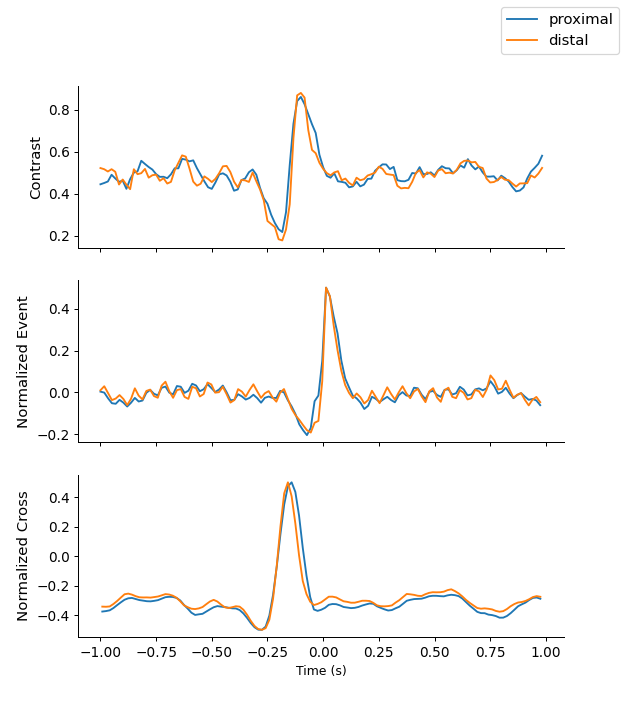

DD: biphasic peak ratio = 0.847360
DD: biphasic area ratio = 1.448307
PD: biphasic peak ratio = 0.781438
PD: biphasic area ratio = 1.155532


In [6]:
prox_vs_dist_fig, prox_vs_dist_ax = plt.subplots(3, sharex=True, figsize=(7, 8))

prox_vs_dist_ax[0].plot(pd["lead_xaxis"], pd["avg_trig_lead"], label="proximal")
prox_vs_dist_ax[0].plot(dd["lead_xaxis"], dd["avg_trig_lead"], label="distal")
prox_vs_dist_ax[0].set_ylabel("Contrast", fontsize=12)

prox_vs_dist_ax[1].plot(pd["event_xaxis"], pd["scaled_trig_event"])
prox_vs_dist_ax[1].plot(dd["event_xaxis"], dd["scaled_trig_event"])
prox_vs_dist_ax[1].set_ylabel("Normalized Event", fontsize=12)

prox_vs_dist_ax[2].plot(pd["cross_xaxis"], pd["scaled_cross_corr"])
prox_vs_dist_ax[2].plot(dd["cross_xaxis"], dd["scaled_cross_corr"])
prox_vs_dist_ax[2].set_ylabel("Normalized Cross", fontsize=12)

prox_vs_dist_ax[-1].set_xlabel("Time (s)")

prox_vs_dist_fig.legend(fontsize=12)
clean_axes(prox_vs_dist_ax)

start_t = -0.5
end_t = 0.25 
start_idx = nearest_index(pd["lead_xaxis"], start_t)
end_idx = nearest_index(pd["lead_xaxis"], end_t)
for k, v in d.items():
    biphasic_peak = (0.5 - np.min(v["avg_trig_lead"])) / (np.max(v["avg_trig_lead"]) - 0.5)
    lead_pos = np.sum(np.clip(v["avg_trig_lead"][start_idx:end_idx] - 0.5, 0, 1)) 
    lead_neg = np.sum(np.clip(v["avg_trig_lead"][start_idx:end_idx] - 0.5, -1, 0)) 
    biphasic_area = -1. * lead_neg / lead_pos 
    print("%s: biphasic peak ratio = %f" % (k, biphasic_peak))
    print("%s: biphasic area ratio = %f" % (k, biphasic_area))

<IPython.core.display.Javascript object>


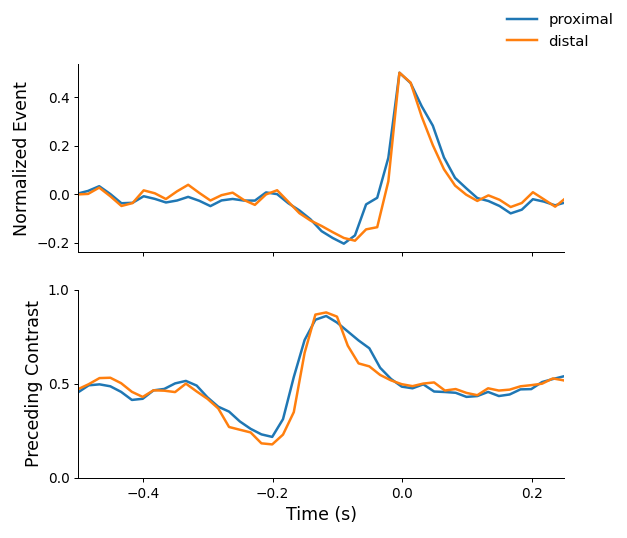

In [7]:
# note: subtracted one rec dt since it seems like my triggered averaging is off one step
# peak is correctly centred on t=0 this way
w = 2.
prox_vs_dist_supp_fig, prox_vs_dist_supp_ax = plt.subplots(2, sharex=True, figsize=(7, 6))

prox_vs_dist_supp_ax[0].plot(
    pd["event_xaxis"] - rec_dt, pd["scaled_trig_event"], linewidth=w)
prox_vs_dist_supp_ax[0].plot(
    dd["event_xaxis"] - rec_dt, dd["scaled_trig_event"], linewidth=w)
prox_vs_dist_supp_ax[0].set_ylabel("Normalized Event", fontsize=14)

prox_vs_dist_supp_ax[1].plot(
    pd["lead_xaxis"] - rec_dt, pd["avg_trig_lead"], label="proximal", linewidth=w)
prox_vs_dist_supp_ax[1].plot(
    dd["lead_xaxis"] - rec_dt, dd["avg_trig_lead"], label="distal", linewidth=w)
prox_vs_dist_supp_ax[1].set_ylim(0, 1)
prox_vs_dist_supp_ax[1].set_yticks([0., 0.5, 1.])
prox_vs_dist_supp_ax[1].set_ylabel("Preceding Contrast", fontsize=14)

prox_vs_dist_supp_ax[-1].set_xlim(-0.5, 0.25)
prox_vs_dist_supp_ax[-1].set_xticks([-0.4, -0.2, 0., 0.2])
prox_vs_dist_supp_ax[-1].set_xlabel("Time (s)", fontsize=14)

prox_vs_dist_supp_fig.legend(fontsize=12, frameon=False)
clean_axes(prox_vs_dist_supp_ax, ticksize=12)
prox_vs_dist_supp_fig.savefig("triggered_event_stim.svg", bbox_inches="tight")

### Full Field ROI lead contrasts and triggered events with trial SEM

<IPython.core.display.Javascript object>


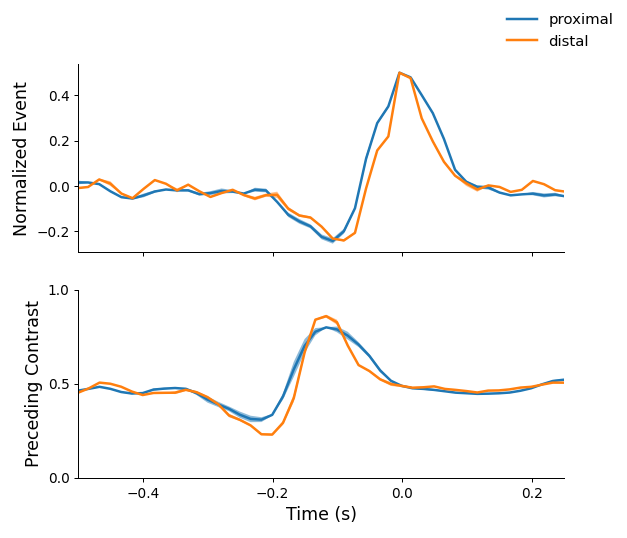

In [24]:
# note: subtracted one rec dt since it seems like my triggered averaging is off one step
# peak is correctly centred on t=0 this way
w = 2.
prox_vs_dist_sem_fig, prox_vs_dist_sem_ax = plt.subplots(2, sharex=True, figsize=(7, 6))

full_field = False
if full_field:
    # full scanfield ROI
    pd_trig_leads = pd["trig_leads"][0, :, :, 0, 0]
    dd_trig_leads = dd["trig_leads"][0, :, :, 0, 0]
    pd_trig_events = pd["trig_events"][0, :, :, 0, 0]
    dd_trig_events = dd["trig_events"][0, :, :, 0, 0]
else:
    # (kept) grid ROI average
    pd_trig_leads = np.mean(d_rois["PD"]["trig_leads"][:, :, :, 0, 0], axis=0)
    dd_trig_leads = np.mean(d_rois["DD"]["trig_leads"][:, :, :, 0, 0], axis=0)
    pd_trig_events = np.mean(d_rois["PD"]["trig_events"][:, :, :, 0, 0], axis=0)
    dd_trig_events = np.mean(d_rois["DD"]["trig_events"][:, :, :, 0, 0], axis=0)

pd_mean_lead = np.mean(pd_trig_leads, axis=0)
dd_mean_lead = np.mean(dd_trig_leads, axis=0)

pd_scaled_trig_events = pd_trig_events / np.max(pd_trig_events, axis=1, keepdims=True) / 2.
dd_scaled_trig_events = dd_trig_events / np.max(dd_trig_events, axis=1, keepdims=True) / 2.
pd_mean_scaled_event = np.mean(pd_scaled_trig_events, axis=0)
dd_mean_scaled_event = np.mean(dd_scaled_trig_events, axis=0)

pd_scaled_trig_event_std = np.std(pd_scaled_trig_events, axis=0)
dd_scaled_trig_event_std = np.std(dd_scaled_trig_events, axis=0)
pd_scaled_trig_event_sem = pd_scaled_trig_event_std / pd["trig_events"].shape[1]
dd_scaled_trig_event_sem = dd_scaled_trig_event_std / dd["trig_events"].shape[1]

prox_vs_dist_sem_ax[0].fill_between(
    pd["event_xaxis"] - rec_dt,
    pd_mean_scaled_event - pd_scaled_trig_event_sem,
    pd_mean_scaled_event + pd_scaled_trig_event_sem,
    alpha=0.5,
)
prox_vs_dist_sem_ax[0].plot(
    pd["event_xaxis"] - rec_dt, pd_mean_scaled_event, linewidth=w)
prox_vs_dist_sem_ax[0].fill_between(
    dd["event_xaxis"] - rec_dt,
    dd_mean_scaled_event - dd_scaled_trig_event_sem,
    dd_mean_scaled_event + dd_scaled_trig_event_sem,
    alpha=0.5,
)
prox_vs_dist_sem_ax[0].plot(
    dd["event_xaxis"] - rec_dt, dd_mean_scaled_event, linewidth=w)
prox_vs_dist_sem_ax[0].set_ylabel("Normalized Event", fontsize=14)

pd_trig_lead_std = np.std(pd_trig_leads, axis=0)
dd_trig_lead_std = np.std(dd_trig_leads, axis=0)
pd_trig_lead_sem = pd_trig_lead_std / pd["trig_leads"].shape[1]
dd_trig_lead_sem = dd_trig_lead_std / dd["trig_leads"].shape[1]

prox_vs_dist_sem_ax[1].fill_between(
    pd["lead_xaxis"] - rec_dt,
    pd_mean_lead - pd_trig_lead_sem,
    pd_mean_lead + pd_trig_lead_sem,
    alpha=0.5,
)
prox_vs_dist_sem_ax[1].plot(
    pd["lead_xaxis"] - rec_dt, pd_mean_lead, label="proximal", linewidth=w)
prox_vs_dist_sem_ax[1].fill_between(
    dd["lead_xaxis"] - rec_dt,
    dd_mean_lead - dd_trig_lead_sem,
    dd_mean_lead + dd_trig_lead_sem,
    alpha=0.5,
)
prox_vs_dist_sem_ax[1].plot(
    dd["lead_xaxis"] - rec_dt, dd_mean_lead, label="distal", linewidth=w)

prox_vs_dist_sem_ax[1].set_ylim(0, 1)
prox_vs_dist_sem_ax[1].set_yticks([0., 0.5, 1.])
prox_vs_dist_sem_ax[1].set_ylabel("Preceding Contrast", fontsize=14)

prox_vs_dist_sem_ax[-1].set_xlim(-0.5, 0.25)
prox_vs_dist_sem_ax[-1].set_xticks([-0.4, -0.2, 0., 0.2])
prox_vs_dist_sem_ax[-1].set_xlabel("Time (s)", fontsize=14)

prox_vs_dist_sem_fig.legend(fontsize=12, frameon=False)
clean_axes(prox_vs_dist_sem_ax, ticksize=12)
prox_vs_dist_sem_fig.savefig("resub/triggered_event_stim_with_sem.svg", bbox_inches="tight")

<IPython.core.display.Javascript object>


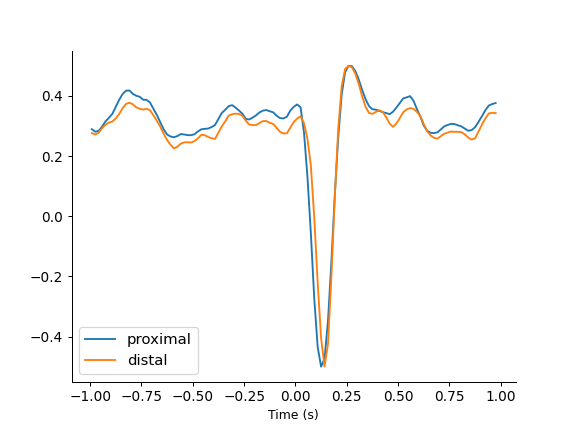

In [10]:
fransen_fig, fransen_ax = plt.subplots(1)
fransen_ax.plot(pd["cross_xaxis"], np.flip(pd["scaled_cross_corr"]) * -1, label="proximal")
fransen_ax.plot(dd["cross_xaxis"], np.flip(dd["scaled_cross_corr"]) * -1, label="distal")
fransen_ax.set_xlabel("Time (s)")
fransen_ax.legend(fontsize=12)
clean_axes(fransen_ax)

In [11]:
dd_roi_leads = np.squeeze(d_rois["DD"]["trig_leads"])
pd_roi_leads = np.squeeze(d_rois["PD"]["trig_leads"])

dd_roi_lead_mean = np.mean(dd_roi_leads, axis=(0, 1))
dd_roi_lead_std = np.std(dd_roi_leads, axis=(0, 1))
# dd_roi_lead_sem = dd_roi_lead_std / np.sum(dd_roi_leads.shape[0:2])
dd_roi_lead_sem = dd_roi_lead_std / dd_roi_leads.shape[0]
pd_roi_lead_mean = np.mean(pd_roi_leads, axis=(0, 1))
pd_roi_lead_std = np.std(pd_roi_leads, axis=(0, 1))
# pd_roi_lead_sem = pd_roi_lead_std / np.sum(pd_roi_leads.shape[0:2])
pd_roi_lead_sem = pd_roi_lead_std / pd_roi_leads.shape[0]

print("roi triggered leads shape:", dd_roi_leads.shape)

roi triggered leads shape: (218, 2, 120)


<IPython.core.display.Javascript object>


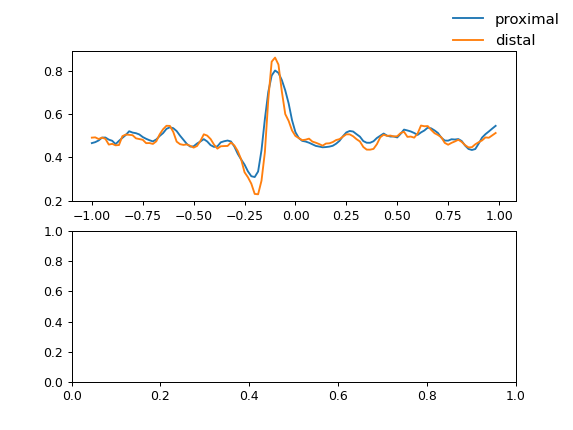

In [12]:
ff, aa = plt.subplots(2)
aa[0].fill_between(
    pd["lead_xaxis"],
    pd_roi_lead_mean - pd_roi_lead_sem,
    pd_roi_lead_mean + pd_roi_lead_sem, 
    alpha=0.2
)
aa[0].plot(pd["lead_xaxis"], pd_roi_lead_mean, label="proximal")
aa[0].fill_between(
    dd["lead_xaxis"],
    dd_roi_lead_mean - dd_roi_lead_sem,
    dd_roi_lead_mean + dd_roi_lead_sem,
    alpha=0.2,
)
aa[0].plot(dd["lead_xaxis"], dd_roi_lead_mean, label="distal")
ff.legend(fontsize=12, frameon=False)

## Per ROI biphasic metrics

In [13]:
dd_roi_lead_trial_means = np.mean(dd_roi_leads, axis=1)
pd_roi_lead_trial_means = np.mean(pd_roi_leads, axis=1)
dd_biphasic_peaks = (
    np.clip((0.5 - np.min(dd_roi_lead_trial_means, axis=1)), 0., 1.)
    / (np.clip((np.max(dd_roi_lead_trial_means, axis=1) - 0.5), 0., 1.) 
        + np.clip((0.5 - np.min(dd_roi_lead_trial_means, axis=1)), 0., 1.))
)
pd_biphasic_peaks = (
    np.clip((0.5 - np.min(pd_roi_lead_trial_means, axis=1)), 0., 1.)
    / (np.clip((np.max(pd_roi_lead_trial_means, axis=1) - 0.5), 0., 1.) 
        + np.clip((0.5 - np.min(pd_roi_lead_trial_means, axis=1)), 0., 1.))
)

start_t = -0.5
end_t = 0.25 
start_idx = nearest_index(pd["lead_xaxis"], start_t)
end_idx = nearest_index(pd["lead_xaxis"], end_t)

dd_lead_pos = np.sum(np.clip(dd_roi_lead_trial_means[:, start_idx:end_idx] - 0.5, 0, 1), axis=1) 
pd_lead_pos = np.sum(np.clip(pd_roi_lead_trial_means[:, start_idx:end_idx] - 0.5, 0, 1), axis=1) 
dd_lead_neg = np.sum(np.clip(dd_roi_lead_trial_means[:, start_idx:end_idx] - 0.5, -1, 0), axis=1) 
pd_lead_neg = np.sum(np.clip(pd_roi_lead_trial_means[:, start_idx:end_idx] - 0.5, -1, 0), axis=1) 
dd_biphasic_areas = -1. * dd_lead_neg / (dd_lead_pos  + -1. * dd_lead_neg)
pd_biphasic_areas = -1. * pd_lead_neg / (pd_lead_pos  + -1. * pd_lead_neg)

<IPython.core.display.Javascript object>


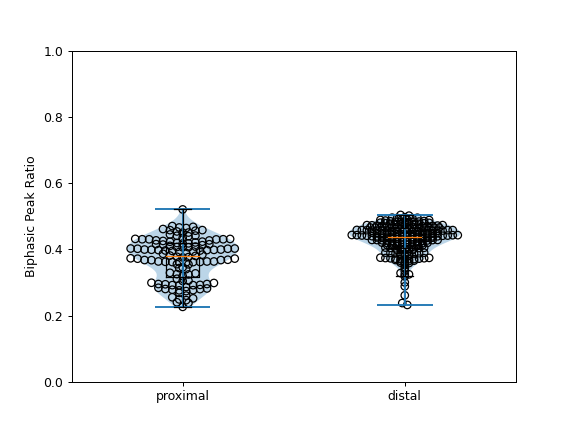

In [14]:
pd_pos = 1
dd_pos = 2
swarm_scale = 0.25

pd_swarm = simple_beeswarm(pd_biphasic_peaks) * swarm_scale + pd_pos
dd_swarm = simple_beeswarm(dd_biphasic_peaks) * swarm_scale + dd_pos 

biphasic_peak_fig, biphasic_peak_ax = plt.subplots(1)
biphasic_peak_ax.violinplot([pd_biphasic_peaks, dd_biphasic_peaks], [pd_pos, dd_pos])
biphasic_peak_ax.scatter(pd_swarm, pd_biphasic_peaks, facecolors="None", edgecolors="black")
biphasic_peak_ax.scatter(dd_swarm, dd_biphasic_peaks, facecolors="None", edgecolors="black")
biphasic_peak_ax.boxplot(
    [pd_biphasic_peaks, dd_biphasic_peaks], positions=[pd_pos, dd_pos], showfliers=False)
biphasic_peak_ax.set_xticks([pd_pos, dd_pos], labels=["proximal", "distal"])
biphasic_peak_ax.set_ylabel("Biphasic Peak Ratio")
biphasic_peak_ax.set_ylim(0, 1)

biphasic_peak_fig.savefig("resub/biphasic_peak_ratio.svg", bbox_inches="tight")
np.savetxt("resub/pd_biphasic_peak_ratios.csv", pd_biphasic_peaks, delimiter=",")
np.savetxt("resub/dd_biphasic_peak_ratios.csv", dd_biphasic_peaks, delimiter=",")

<IPython.core.display.Javascript object>


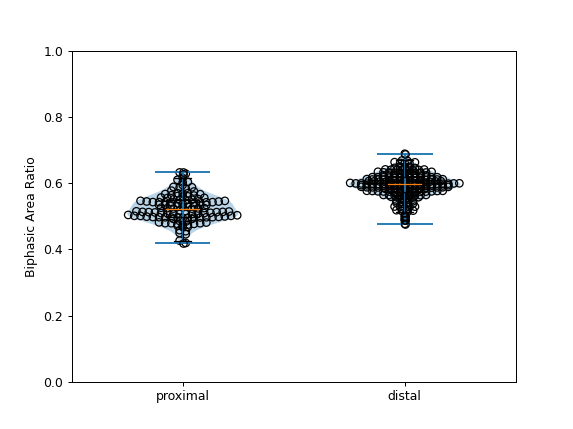

In [15]:
pd_swarm = simple_beeswarm(pd_biphasic_areas) * swarm_scale + pd_pos
dd_swarm = simple_beeswarm(dd_biphasic_areas) * swarm_scale + dd_pos

biphasic_area_fig, biphasic_area_ax = plt.subplots(1)
biphasic_area_ax.violinplot([pd_biphasic_areas, dd_biphasic_areas], [pd_pos, dd_pos])
biphasic_area_ax.scatter(pd_swarm, pd_biphasic_areas, facecolors="None", edgecolors="black")
biphasic_area_ax.scatter(dd_swarm, dd_biphasic_areas, facecolors="None", edgecolors="black")
biphasic_area_ax.boxplot([pd_biphasic_areas, dd_biphasic_areas], positions=[pd_pos, dd_pos])
biphasic_area_ax.set_xticks([pd_pos, dd_pos], labels=["proximal", "distal"])
biphasic_area_ax.set_ylim(0, 1)
biphasic_area_ax.set_ylabel("Biphasic Area Ratio")

biphasic_area_fig.savefig("resub/biphasic_area_ratio.svg", bbox_inches="tight")
np.savetxt("resub/pd_biphasic_area_ratios.csv", pd_biphasic_areas, delimiter=",")
np.savetxt("resub/dd_biphasic_area_ratios.csv", dd_biphasic_areas, delimiter=",")